# Final Project Part 3 : Adult Income Analysis (greater than 50k?)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import ggplot as gg

from sklearn import metrics, tree, ensemble, cross_validation, grid_search
from IPython.display import Image

import os


%matplotlib inline
mpl.rcParams['figure.figsize'] = 5, 5

In [2]:
income_data = pd.read_csv('./adult.csv')
income_data.head(n=5)

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [3]:
income_data.shape

(32561, 15)

In [4]:
income_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
income_data.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

There are ? marks in the data. Lets change those ? marks to NaN

In [6]:
def _change_question(df):
    df_columns = df.columns.values
    col_count = df.shape[1]
    for col in range(col_count):
        col_to_use = df_columns[col]
        df[col_to_use] = df[col_to_use].replace('?', np.nan)
    return

In [7]:
_change_question(income_data)

In [8]:
income_data = income_data.dropna()

In [9]:
income_data.education.value_counts()
education_dict = {
    'Preschool' : 'less_than_hs',
    '1st-4th' : 'less_than_hs',
    '5th-6th' : 'less_than_hs',
    '7th-8th' : 'less_than_hs',
    '9th' : 'some_hs',
    '10th' : 'some_hs',
    '11th' : 'some_hs',
    '12th' : 'some_hs',
    'HS-grad' : 'hs_grad',
    'Some-college' : 'some_college',
    'Assoc-acdm' : 'assoc_acdm',
    'Assoc-voc' : 'assoc_voc',
    'Bachelors' : 'bachelors',
    'Masters' : 'masters',
    'Prof-school' : 'prof_schl',
    'Doctorate' : 'doctorate'
}
income_data.education.replace(to_replace=education_dict, inplace=True)

In [10]:
income_data = income_data.drop(income_data[['education.num']], axis=1)

income_data['education.num'] = income_data.education.map({
    'less_than_hs' : 1,
    'some_hs' : 2,
    'hs_grad' : 3,
    'some_college' : 4,
    'assoc_acdm' : 5,
    'assoc_voc' : 6,
    'bachelors' : 7,
    'masters' : 8,
    'prof_schl' : 9,
    'doctorate' : 10
})


In [11]:
income_data.describe()

age        fnlwgt  capital.gain  capital.loss  hours.per.week  \
count  30162.000000  3.016200e+04  30162.000000  30162.000000    30162.000000   
mean      38.437902  1.897938e+05   1092.007858     88.372489       40.931238   
std       13.134665  1.056530e+05   7406.346497    404.298370       11.979984   
min       17.000000  1.376900e+04      0.000000      0.000000        1.000000   
25%       28.000000  1.176272e+05      0.000000      0.000000       40.000000   
50%       37.000000  1.784250e+05      0.000000      0.000000       40.000000   
75%       47.000000  2.376285e+05      0.000000      0.000000       45.000000   
max       90.000000  1.484705e+06  99999.000000   4356.000000       99.000000   

       education.num  
count   30162.000000  
mean        4.393177  
std         2.076584  
min         1.000000  
25%         3.000000  
50%         4.000000  
75%         7.000000  
max        10.000000

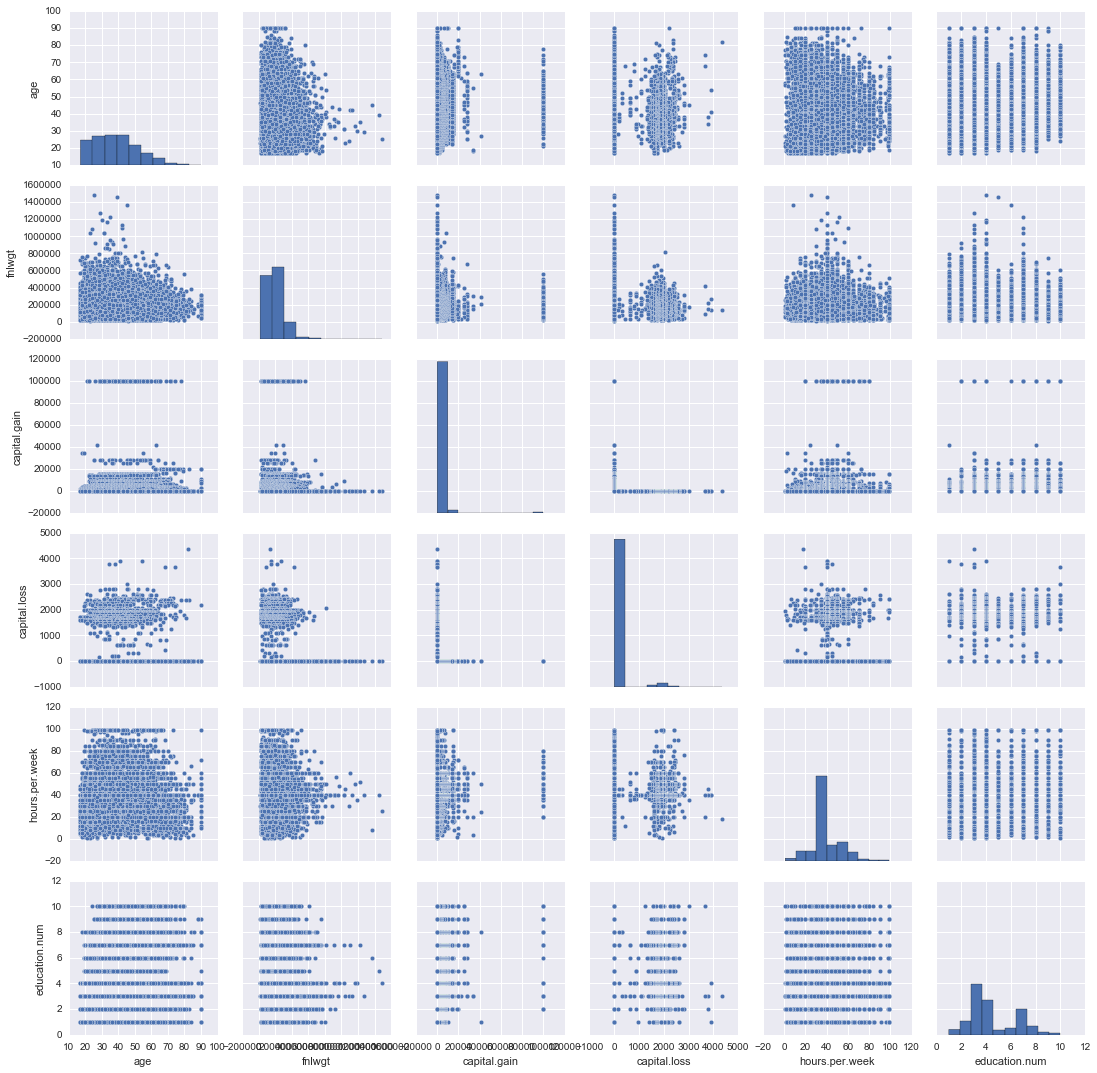

In [12]:
sns.pairplot(income_data)

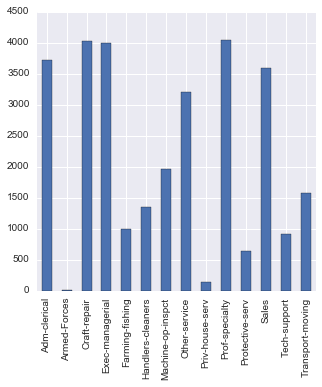

In [13]:
income_data.occupation.value_counts().sort_index().plot(kind='bar')

<=50K    22654
>50K      7508
Name: income, dtype: int64
Income Percent Difference 202%


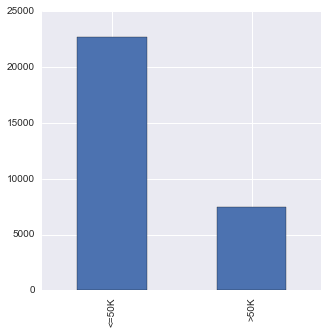

In [14]:
income_data.income.value_counts().sort_index().plot(kind='bar')
print income_data.income.value_counts()
print 'Income Percent Difference', '{:.0%}'.format(((22654-7508)/float(7508)))

hs_grad         9840
some_college    6678
bachelors       5044
some_hs         2700
masters         1627
assoc_voc       1307
less_than_hs    1041
assoc_acdm      1008
prof_schl        542
doctorate        375
Name: education, dtype: int64


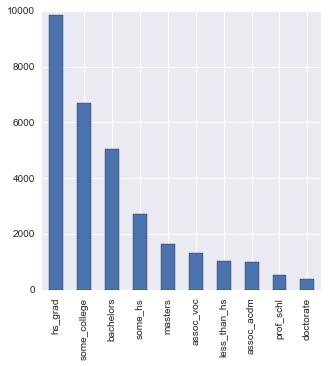

In [15]:
income_data.education.value_counts().plot(kind='bar')
print income_data.education.value_counts()

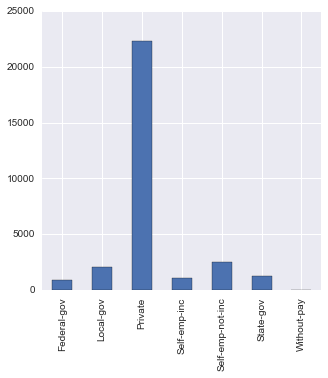

In [16]:
income_data.workclass.value_counts().sort_index().plot(kind='bar')

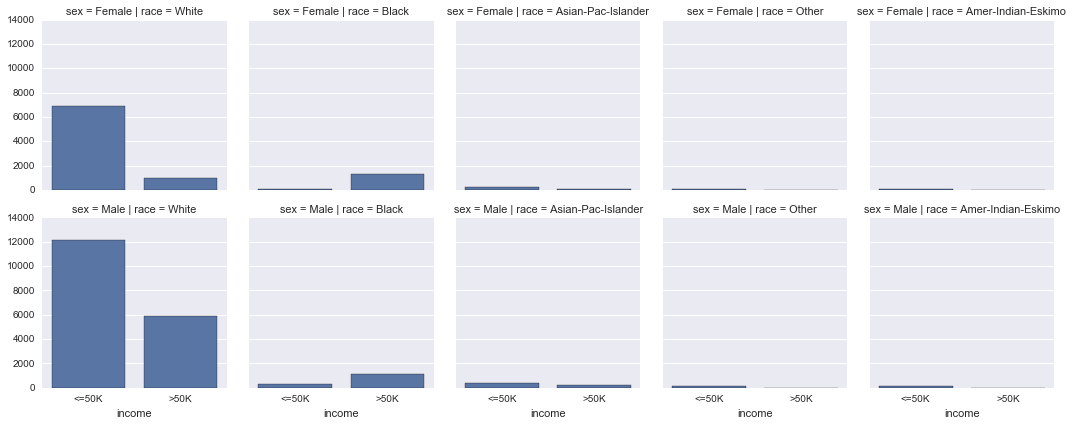

In [17]:
grid = sns.FacetGrid(income_data, row='sex', col = 'race')
grid.map(sns.countplot, 'income')

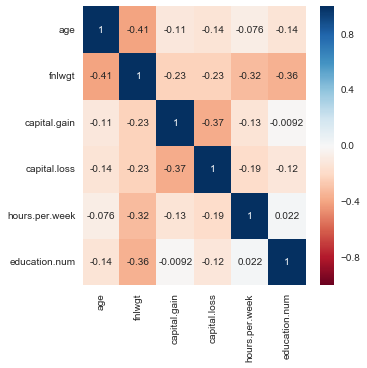

In [18]:
income_corr = income_data.corr()
sns.heatmap(income_corr.corr(), annot=True, cmap='RdBu')

There doesn't appear to be any colinearity here that needs to be accounted for. We will not be using capitol loss, capital gain, and any weighting used in this analysis.  

In [19]:
pd.pivot_table(income_data,index = ['education','sex','education.num'], columns= 'income', values = ['age', 'hours.per.week'])

age            hours.per.week  \
income                                 <=50K       >50K          <=50K   
education    sex    education.num                                        
assoc_acdm   Female 5              35.500000  38.358491      37.692982   
             Male   5              36.239024  42.133005      41.839024   
assoc_voc    Female 6              36.857868  39.147541      38.474619   
             Male   6              36.660808  43.173145      43.253076   
bachelors    Female 7              34.278008  39.264984      39.124481   
             Male   7              37.030356  42.964621      42.183888   
doctorate    Female 10             43.593750  46.285714      48.125000   
             Male   10             44.746032  48.450216      45.968254   
hs_grad      Female 3              38.170066  43.403756      37.030418   
             Male   3              37.061351  44.885328      41.954784   
less_than_hs Female 1              47.172549  37.666667      35.188235   
             Male   1              44.193724  51.720000      40.240109   
masters      Female 8              42.148368  44.412791      40.783383   
             Male   8              41.666667  45.337802      42.537634   
prof_schl    Female 9              39.800000  40.166667      42.000000   
             Male   9              44.406593  45.230769      44.714286   
some_college Female 4              33.608958  43.135135      34.863480   
             Male   4              34.647682  44.010426      40.409934   
some_hs      Female 2              33.462722  50.882353      31.205917   
             Male   2              35.122995  46.109677      37.814617   

                                              
income                                  >50K  
education    sex    education.num             
assoc_acdm   Female 5              39.377358  
             Male   5              46.216749  
assoc_voc    Female 6              38.983607  
             Male   6              44.826855  
bachelors    Female 7              41.649842  
             Male   7              46.447208  
doctorate    Female 10             47.428571  
             Male   10             48.385281  
hs_grad      Female 3              38.464789  
             Male   3              46.234330  
less_than_hs Female 1              43.333333  
             Male   1              47.640000  
masters      Female 8              42.627907  
             Male   8              47.024129  
prof_schl    Female 9              48.000000  
             Male   9              49.508242  
some_college Female 4              38.443243  
             Male   4              46.119896  
some_hs      Female 2              41.352941  
             Male   2              44.767742

In [20]:
# drop the columns we aren't going to use 'fnlwgt' and 'education.number'
colsToDrop = ['fnlwgt','education.num', 'native.country']
# first making a copy of the originally loaded dataset for insurance
income_data_copy= income_data.copy()
income_data = income_data.drop(colsToDrop, axis=1)

In [21]:
income_dummies = pd.get_dummies(income_data.iloc[:,0:10])
income_tree = pd.concat([income_dummies, income_data[['income']]], axis=1)

In [22]:
X = income_tree.iloc[:,0:-1]
y = income_tree.income
type_names = income_data.income.values
#print X.columns.values

In [23]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=9)

In [24]:
tree_c = tree.DecisionTreeClassifier(max_depth= 6,min_samples_split = 40,random_state=9) 
tree_c.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=9, splitter='best')

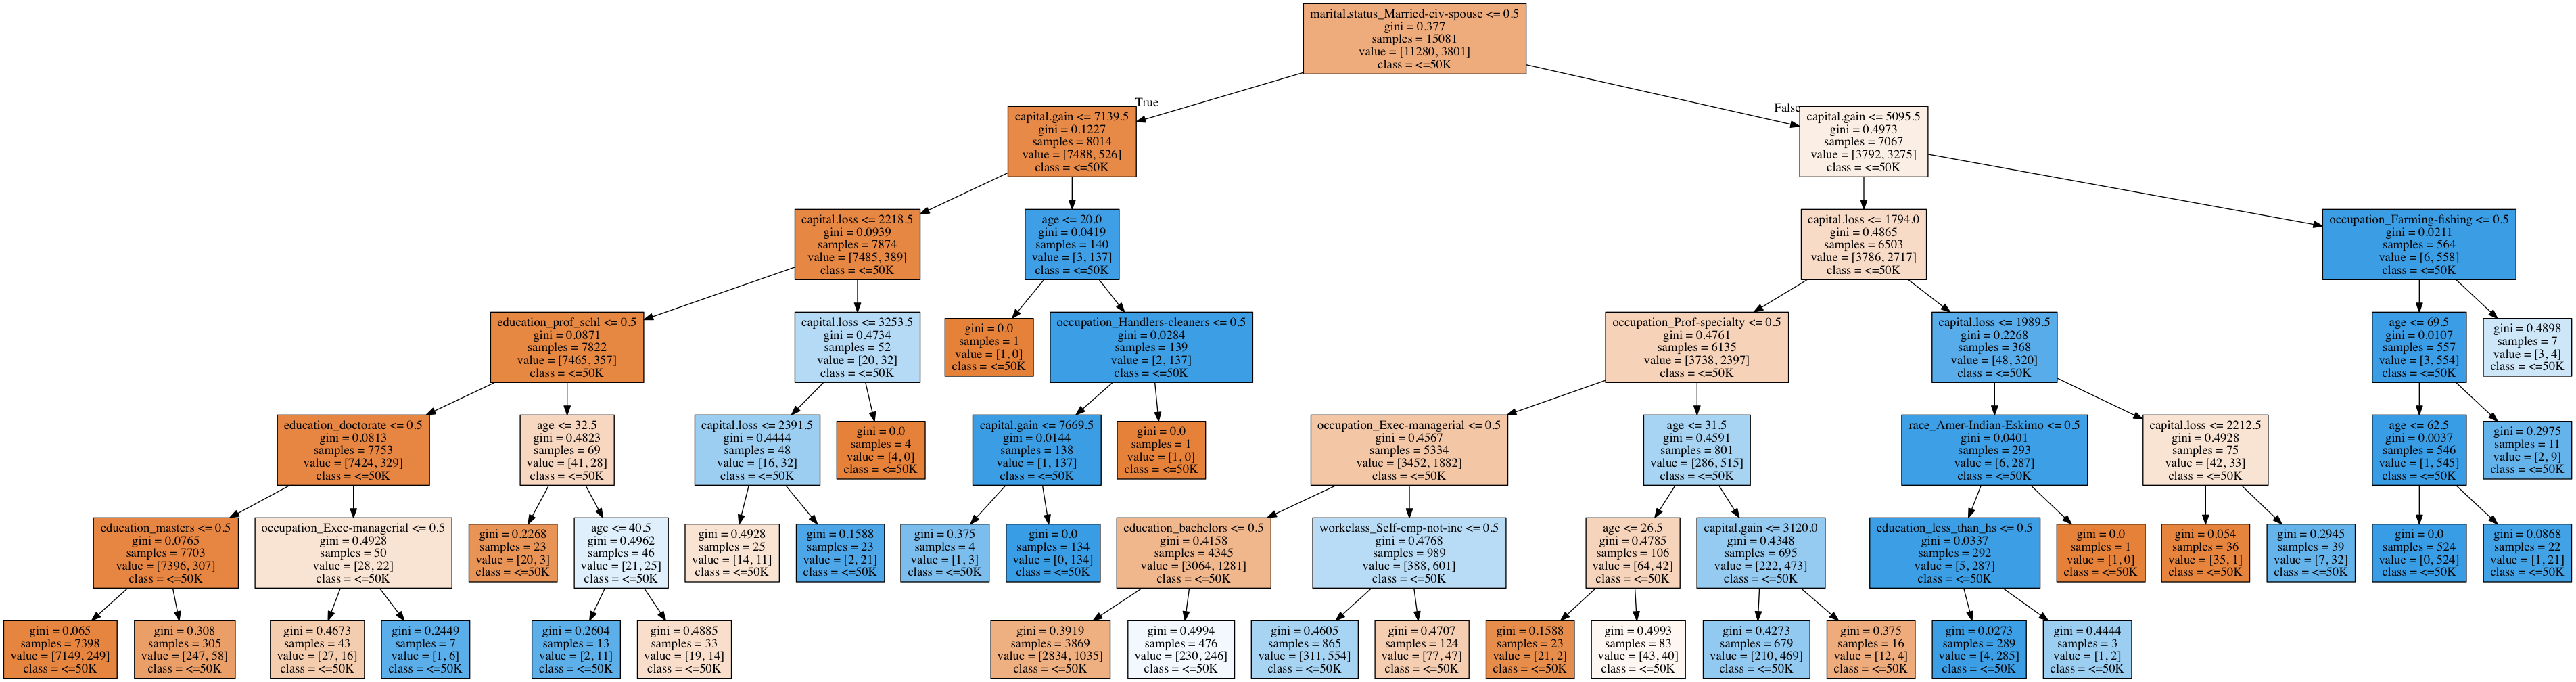

In [25]:
tree.export_graphviz(tree_c, out_file='tree.dot', feature_names=income_tree.columns.values, 
                class_names=income_tree.income.values, filled=True)

os.system('dot -Tpng tree.dot -o tree.png')

Image('tree.png')

         imp                                var
22  0.482402  marital.status_Married-civ-spouse
1   0.236705                       capital.gain
2   0.105409                       capital.loss
30  0.065167         occupation_Exec-managerial
36  0.047585          occupation_Prof-specialty
12  0.021385                education_bachelors
0   0.012891                                age
17  0.007331                education_prof_schl
13  0.006457                education_doctorate
7   0.006017         workclass_Self-emp-not-inc
16  0.005825                  education_masters
31  0.001005         occupation_Farming-fishing
32  0.000794       occupation_Handlers-cleaners
47  0.000782            race_Amer-Indian-Eskimo
15  0.000246             education_less_than_hs


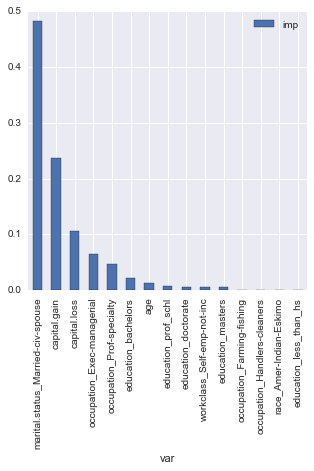

In [26]:
var_imp = pd.DataFrame({'var': income_tree.iloc[:,0:-1].columns.values, 'imp': tree_c.feature_importances_})
var_imp = var_imp.sort_values('imp', ascending=False).head(n=15)
var_imp.plot(x='var', y='imp', kind='bar')

print var_imp.head(n=15)

In [27]:
first_tree_preds = tree_c.predict(X_test)
print pd.crosstab(y_test, first_tree_preds, rownames=['Y Test'], colnames=['Predictions']).T
print '\n'
print 'Accuracy', metrics.accuracy_score(y_test, first_tree_preds)
print 'Misclassification Rate', 1 - metrics.accuracy_score(y_test, first_tree_preds)
print 'Adjusted Rand Score', metrics.adjusted_rand_score(y_test, first_tree_preds)

Y Test       <=50K  >50K
Predictions             
<=50K        10637  1525
>50K           737  2182


Accuracy 0.85000994629
Misclassification Rate 0.14999005371
Adjusted Rand Score 0.435173838064


In [30]:
print metrics.classification_report(y_test, first_tree_preds, target_names = ['<=50K', '>50k'])

             precision    recall  f1-score   support

      <=50K       0.87      0.94      0.90     11374
       >50k       0.75      0.59      0.66      3707

avg / total       0.84      0.85      0.84     15081



While the precision and recall aren't bad for <=50k there is a sharp drop off for >50k. The initial model is misclassifying at 15%

## Fitting the model

In [30]:
depth_vals = np.arange(5,20,1)
samplesplit_vals = np.arange(10,70,5)

In [25]:
gs = grid_search.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=9),
    param_grid={'max_depth': depth_vals, 'min_samples_split' : samplesplit_vals},
    scoring = 'adjusted_rand_score',
    cv=5,
)
gs.fit(X, y)

print gs.best_score_
print gs.best_params_
print gs.best_estimator_

0.283876489523
{'min_samples_split': 30, 'max_depth': 9}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=9, splitter='best')


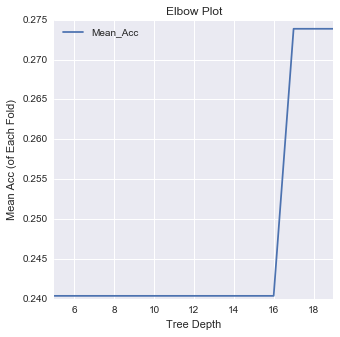

In [35]:
mean_score = [g[1] for g in gs.grid_scores_]
sdev_score = [np.std(g[2]) for g in gs.grid_scores_]


grid_res = pd.DataFrame(list(zip(depth_vals, mean_score, sdev_score)), \
                        columns=['Depth', 'Mean_Acc', 'Sdev_Acc'])

grid_res.plot('Depth','Mean_Acc')

plt.xlabel('Tree Depth')
plt.ylabel('Mean Acc (of Each Fold)')
plt.title('Elbow Plot')

In [215]:
rand_tree_mod = tree.DecisionTreeClassifier(max_depth= 9,min_samples_split = 30,random_state=9) 
rand_tree_mod.fit(X, y)


rand_tree_preds = rand_tree_mod.predict(X)
print pd.crosstab(y, rand_tree_preds, rownames=['Y'], colnames=['Predictions']).T
print '\n'
print 'Accuracy', metrics.accuracy_score(y, rand_tree_preds)
print 'Misclassification Rate', 1 - metrics.accuracy_score(y, rand_tree_preds)
print 'Adjusted Rand Score', metrics.adjusted_rand_score(y, rand_tree_preds)
print '\n'
print metrics.classification_report(y, rand_tree_preds, target_names = ['<=50K', '>50k'])

Y            <=50K  >50K
Predictions             
<=50K        21551  3134
>50K          1103  4374


Accuracy 0.859525230422
Misclassification Rate 0.140474769578
Adjusted Rand Score 0.462008909912


             precision    recall  f1-score   support

      <=50K       0.87      0.95      0.91     22654
       >50k       0.80      0.58      0.67      7508

avg / total       0.85      0.86      0.85     30162



### Accuracy fit metrics

In [31]:
gs_prec = grid_search.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=9),
    param_grid={'max_depth': depth_vals, 'min_samples_split' : samplesplit_vals},
    scoring = 'accuracy',
    cv=5,
)
gs_prec.fit(X, y)

print gs_prec.best_score_
print gs_prec.best_params_
print gs_prec.best_estimator_

0.801306279424
{'min_samples_split': 65, 'max_depth': 9}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=65, min_weight_fraction_leaf=0.0,
            presort=False, random_state=9, splitter='best')


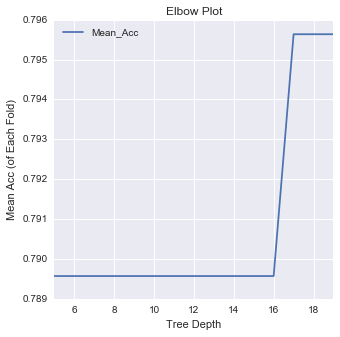

In [32]:
mean_score = [g[1] for g in gs_prec.grid_scores_]
sdev_score = [np.std(g[2]) for g in gs_prec.grid_scores_]


grid_res = pd.DataFrame(list(zip(depth_vals, mean_score, sdev_score)), \
                        columns=['Depth', 'Mean_Acc', 'Sdev_Acc'])

grid_res.plot('Depth','Mean_Acc')

plt.xlabel('Tree Depth')
plt.ylabel('Mean Acc (of Each Fold)')
plt.title('Elbow Plot')

In [33]:
acc_tree_mod = tree.DecisionTreeClassifier(max_depth= 9,min_samples_split = 65,random_state=9) 
acc_tree_mod.fit(X, y)

acc_tree = acc_tree_mod.predict(X)
print pd.crosstab(y, acc_tree, rownames=['Y'], colnames=['Predictions']).T
print 'Accuracy', metrics.accuracy_score(y, acc_tree)
print 'Misclassification Rate', 1 - metrics.accuracy_score(y, acc_tree)
print 'Adjusted Rand Score', metrics.adjusted_rand_score(y, acc_tree)
print metrics.classification_report(y, acc_tree, target_names = ['<=50K', '>50k'])

Y            <=50K  >50K
Predictions             
<=50K        21532  3151
>50K          1122  4357
Accuracy 0.858331675618
Misclassification Rate 0.141668324382
Adjusted Rand Score 0.458216939425
             precision    recall  f1-score   support

      <=50K       0.87      0.95      0.91     22654
       >50k       0.80      0.58      0.67      7508

avg / total       0.85      0.86      0.85     30162



Fitting the model I used the following two scorings 'accuracy' and 'Adjusted Rand Score' I found that 'Adjusted Rand Scord' used as the scoring method lead to the best fitting model. I tested both scoring methods using a max depth between 5 and 20 by 1 and a minimum sample split between 10 and 100 samples by 5. Since both precision and recall for both models are similar I chose the model optimizing the Adjusted Rand Score, it provided the highest accuracy and lowest misclassification rate. Both models are an increase over the unfitted initial decision tree. 

### Creating the final tree

In [27]:
final_tree = tree.DecisionTreeClassifier(max_depth= 9,min_samples_split = 30,random_state=9) 
final_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=9, splitter='best')

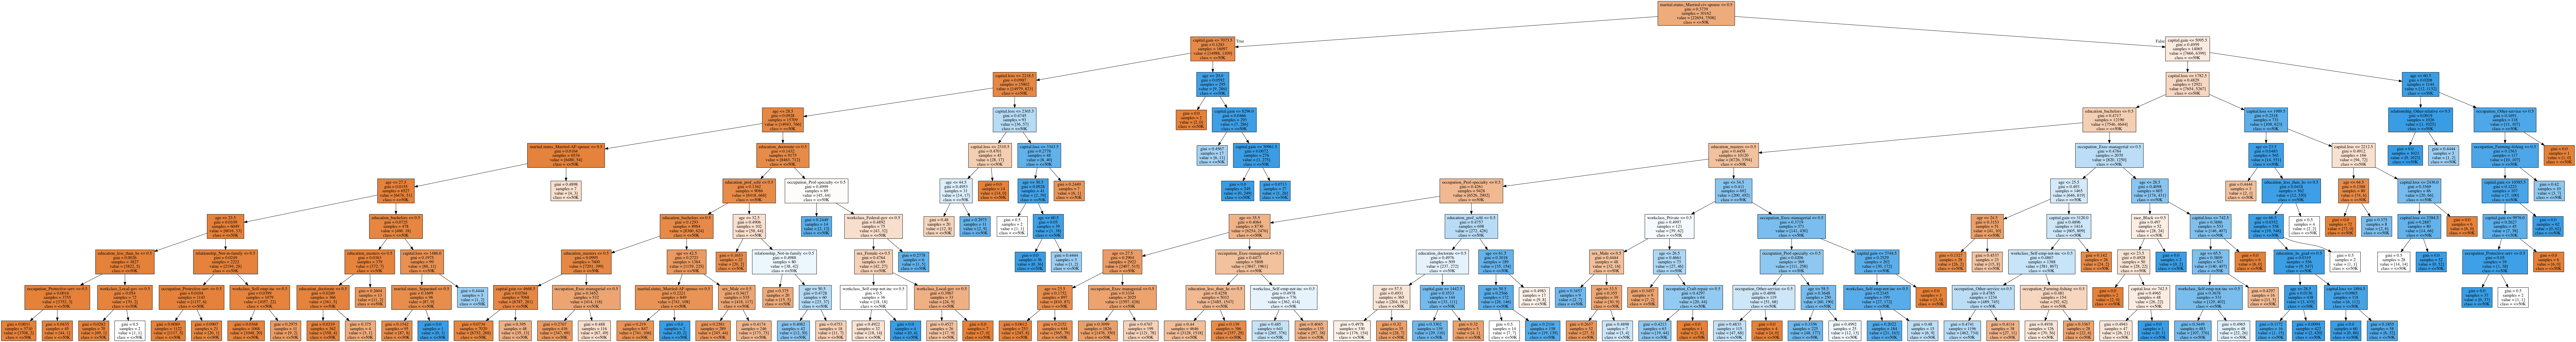

In [28]:
tree.export_graphviz(final_tree, out_file='tree.dot', feature_names=income_tree.columns.values, 
                class_names=income_tree.income.values, filled=True)

os.system('dot -Tpng tree.dot -o tree.png')

Image('tree.png')

In [29]:
final_tree_preds = final_tree.predict(X)
print pd.crosstab(y, final_tree_preds, rownames=['Y'], colnames=['Predictions']).T
print '\n'
print 'Accuracy', metrics.accuracy_score(y, final_tree_preds)
print 'Misclassification Rate', 1 - metrics.accuracy_score(y, final_tree_preds)
print 'Adjusted Rand Score', metrics.adjusted_rand_score(y, final_tree_preds)
print '\n'
print metrics.classification_report(y, final_tree_preds, target_names = ['<=50K', '>50k'])

Y            <=50K  >50K
Predictions             
<=50K        21551  3134
>50K          1103  4374


Accuracy 0.859525230422
Misclassification Rate 0.140474769578
Adjusted Rand Score 0.462008909912


             precision    recall  f1-score   support

      <=50K       0.87      0.95      0.91     22654
       >50k       0.80      0.58      0.67      7508

avg / total       0.85      0.86      0.85     30162



         imp                                var
22  0.422341  marital.status_Married-civ-spouse
1   0.234088                       capital.gain
2   0.100011                       capital.loss
12  0.052374                education_bachelors
0   0.048527                                age
16  0.045843                  education_masters
36  0.027948          occupation_Prof-specialty
30  0.022887         occupation_Exec-managerial
13  0.010217                education_doctorate
17  0.009079                education_prof_schl
15  0.008885             education_less_than_hs
7   0.007786         workclass_Self-emp-not-inc
34  0.002285           occupation_Other-service
53  0.001873                           sex_Male
21  0.001044   marital.status_Married-AF-spouse


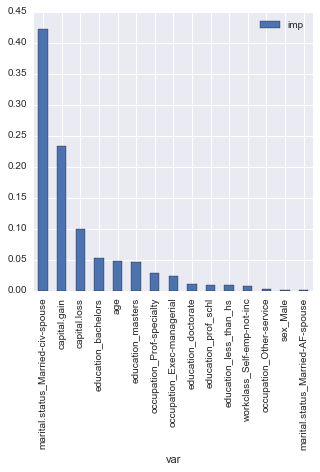

In [30]:
var_imp = pd.DataFrame({'var': income_tree.iloc[:,0:-1].columns.values, 'imp': final_tree.feature_importances_})
var_imp = var_imp.sort_values('imp', ascending=False).head(n=15)
var_imp.plot(x='var', y='imp', kind='bar')

print var_imp.head(n=15)

### Comparing to Randomforest

In [34]:
rf = ensemble.RandomForestClassifier(random_state=9)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print 'Accuracy', metrics.accuracy_score(y_test, rf_preds)
print 'Misclassification Rate', 1 - metrics.accuracy_score(y_test, rf_preds)
print 'Adjusted Rand Score', metrics.adjusted_rand_score(y_test, rf_preds)
print '\n'
print metrics.classification_report(y_test, rf_preds, target_names = ['<=50K', '>50k'])

Accuracy 0.832769710231
Misclassification Rate 0.167230289769
Adjusted Rand Score 0.391973498585


             precision    recall  f1-score   support

      <=50K       0.87      0.91      0.89     11374
       >50k       0.68      0.60      0.64      3707

avg / total       0.83      0.83      0.83     15081



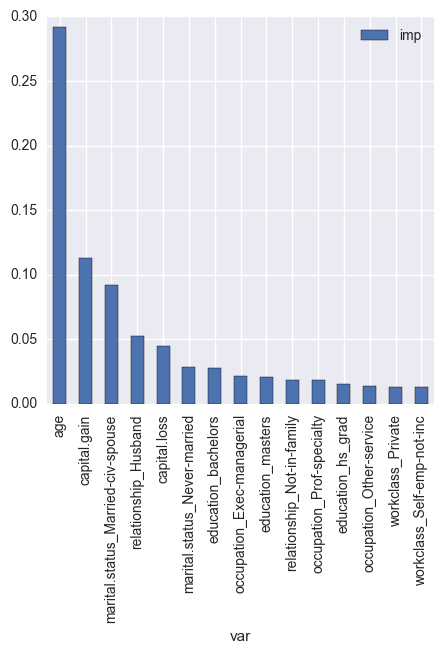

In [221]:
var_imp2 = pd.DataFrame({'var': income_tree.iloc[:,0:-1].columns.values, 'imp': rf.feature_importances_})
var_imp2 = var_imp2.sort_values('imp', ascending=False).head(n = 15)
var_imp2.plot(x='var', y='imp', kind='bar')

##### Information from final fitted Decision Tree
|Estimator | Value|
|---|---|
|Accuracy |0.859525230422|
|Misclassification Rate | 0.140474769578|
|Adjusted Rand Score | 0.462008909912|

The unfitted random forest 


### Fitting the Random Forest

In [108]:
n_trees = np.arange(1,10)
depth_vals = np.arange(5,12,1)
# lowering since decision trees didn't show any advantage for including >60
samplesplit_vals = np.arange(10,100,5)

In [116]:
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=9),
    param_grid={'n_estimators': n_trees,'max_depth': depth_vals, 'min_samples_split' : samplesplit_vals},
    scoring = 'accuracy',
    cv=5,
)
gs.fit(X, y)

print gs.best_score_
print gs.best_params_
print gs.best_estimator_

0.334194566494
{'min_samples_split': 90, 'n_estimators': 2, 'max_depth': 9}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=90,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=9, verbose=0, warm_start=False)


In [122]:
rf_fitted = ensemble.RandomForestClassifier(n_estimators= 2,max_depth=9, min_samples_split=90,random_state=9)
rf_fitted.fit(X,y)

rf_fitted_preds = rf_fitted.predict(X)
print pd.crosstab(y, rf_fitted_preds, rownames=['Y'], colnames=['Predictions']).T
print '\n'
print 'Accuracy', metrics.accuracy_score(y, rf_fitted_preds)
print 'Misclassification Rate', 1 - metrics.accuracy_score(y, rf_fitted_preds)
print 'Adjusted Rand Score', metrics.adjusted_rand_score(y, rf_fitted_preds)
print '\n'
print metrics.classification_report(y, rf_fitted_preds, target_names = ['<=50K', '>50k'])

Y            <=50K  >50K
Predictions             
<=50K        21513  3616
>50K          1141  3892


Accuracy 0.842284994364
Misclassification Rate 0.157715005636
Adjusted Rand Score 0.40165019133


             precision    recall  f1-score   support

      <=50K       0.86      0.95      0.90     22654
       >50k       0.77      0.52      0.62      7508

avg / total       0.84      0.84      0.83     30162



In [ ]:
gs_ars = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=9),
    param_grid={'n_estimators': n_trees,'max_depth': depth_vals, 'min_samples_split' : samplesplit_vals},
    scoring = 'adjusted_rand_score',
    cv=5,
)
gs_ars.fit(X, y)

print gs_ars.best_score_
print gs_ars.best_params_
print gs_ars.best_estimator_

In [123]:
rf_fitted_ars = ensemble.RandomForestClassifier(n_estimators= 7,max_depth=11, min_samples_split=70,random_state=9)
rf_fitted_ars.fit(X,y)

rf_fitted_preds_ars = rf_fitted_ars.predict(X)
print pd.crosstab(y, rf_fitted_preds_ars, rownames=['Y'], colnames=['Predictions']).T
print '\n'
print 'Accuracy', metrics.accuracy_score(y, rf_fitted_preds_ars)
print 'Misclassification Rate', 1 - metrics.accuracy_score(y, rf_fitted_preds_ars)
print 'Adjusted Rand Score', metrics.adjusted_rand_score(y, rf_fitted_preds_ars)
print '\n'
print metrics.classification_report(y, rf_fitted_preds_ars, target_names = ['<=50K', '>50k'])

Y            <=50K  >50K
Predictions             
<=50K        21499  3210
>50K          1155  4298


Accuracy 0.855281480008
Misclassification Rate 0.144718519992
Adjusted Rand Score 0.448178116172


             precision    recall  f1-score   support

      <=50K       0.87      0.95      0.91     22654
       >50k       0.79      0.57      0.66      7508

avg / total       0.85      0.86      0.85     30162



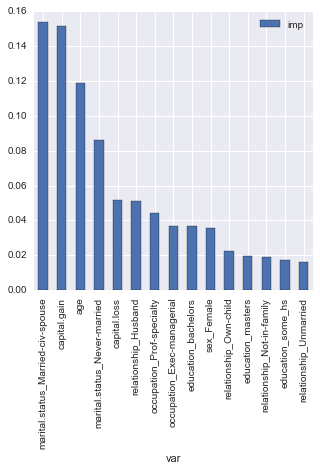

In [124]:
var_imp2 = pd.DataFrame({'var': income_tree.iloc[:,0:-1].columns.values, 'imp': rf_fitted_ars.feature_importances_})
var_imp2 = var_imp2.sort_values('imp', ascending=False).head(n = 15)
var_imp2.plot(x='var', y='imp', kind='bar')

In [35]:
fun_tree = tree.DecisionTreeClassifier(max_depth= 16,min_samples_split = 30,random_state=9) 
fun_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=9, splitter='best')

In [37]:
fun_tree_preds = fun_tree.predict(X)
print pd.crosstab(y, fun_tree_preds, rownames=['Y'], colnames=['Predictions']).T
print '\n'
print 'Accuracy', metrics.accuracy_score(y, fun_tree_preds)
print 'Misclassification Rate', 1 - metrics.accuracy_score(y, fun_tree_preds)
print 'Adjusted Rand Score', metrics.adjusted_rand_score(y, fun_tree_preds)
print '\n'
print metrics.classification_report(y, fun_tree_preds, target_names = ['<=50K', '>50k'])

Y            <=50K  >50K
Predictions             
<=50K        21568  2778
>50K          1086  4730


Accuracy 0.871891784364
Misclassification Rate 0.128108215636
Adjusted Rand Score 0.506211897405


             precision    recall  f1-score   support

      <=50K       0.89      0.95      0.92     22654
       >50k       0.81      0.63      0.71      7508

avg / total       0.87      0.87      0.87     30162



         imp                                var
22  0.371045  marital.status_Married-civ-spouse
1   0.214564                       capital.gain
2   0.093497                       capital.loss
0   0.069992                                age
12  0.046025                education_bachelors
16  0.040286                  education_masters
36  0.025969          occupation_Prof-specialty
30  0.022089         occupation_Exec-managerial
7   0.010397         workclass_Self-emp-not-inc
19  0.010042                  education_some_hs
13  0.009144                education_doctorate
15  0.009086             education_less_than_hs
17  0.008290                education_prof_schl
34  0.007371           occupation_Other-service
14  0.006321                  education_hs_grad


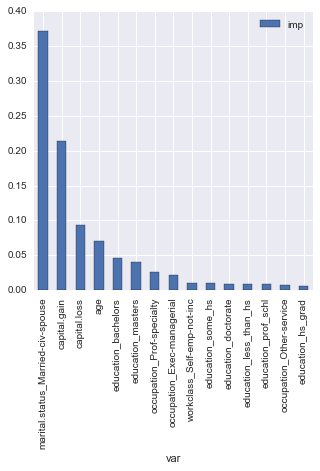

In [40]:
var_imp = pd.DataFrame({'var': income_tree.iloc[:,0:-1].columns.values, 'imp': fun_tree.feature_importances_})
var_imp = var_imp.sort_values('imp', ascending=False).head(n=15)
var_imp.plot(x='var', y='imp', kind='bar')

print var_imp.head(n=15)